In [20]:
import pandas as pd

# Read the dataset and skip problematic lines
train_dataset = pd.read_csv("/kaggle/input/train-drugname/training.txt", on_bad_lines='skip', header=None)

X_train, y_train = [], []
for index, row in train_dataset.iterrows():
    image_name, label = row[0].split(":", 1)
    X_train.append(image_name.strip())
    y_train.append(label.strip())

char_list = set()
for label in y_train:
    char_list.update(set(label))

char_list = sorted(char_list)
print(char_list)

# convert the words to array of indexs based on the char_list
def encode_to_labels(txt):
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list:", char)

    return dig_lst

[' ', "'", '(', ')', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', 'Â', 'Ã', 'Ê', 'Í', 'Đ', 'Ư', 'Ạ', 'Ầ', 'Ế', 'Ệ', 'Ố', 'ố', 'Ộ', 'Ỡ']


## Preprocessing

In [2]:
import cv2
import os

IMAGE_DIR = "/kaggle/input/train-drugname/cropped_img"
TIME_STEP = 240    #
dict_filepath_label = {}
for i in range(len(X_train)):
    dict_filepath_label[X_train[i]] = y_train[i]

label_lens = []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)              #57

# find max, min height & width
widths, heights = [], []
all_image_paths = []
for image_path in X_train:
    all_image_path = (os.path.join(IMAGE_DIR, image_path))
    img = cv2.imread(all_image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)
    all_image_paths.append(all_image_path)

min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)
(min_height, max_height, max_height, max_width)   # (22, 48, 48, 855)  vs (94, 376, 955, 2694)

(22, 48, 48, 855)

has processed trained  500 file
has processed trained  1000 file
has processed trained  1500 file
has processed trained  2000 file
2522


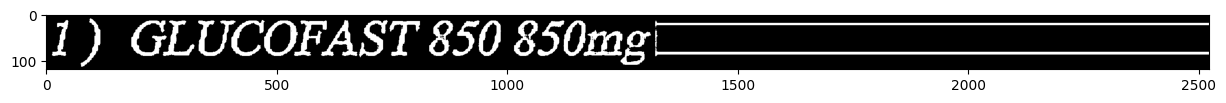

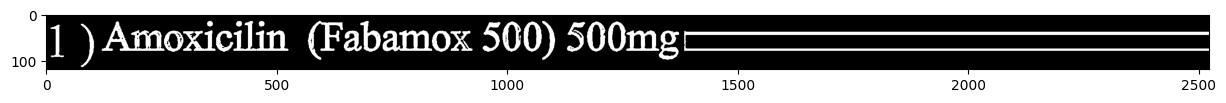

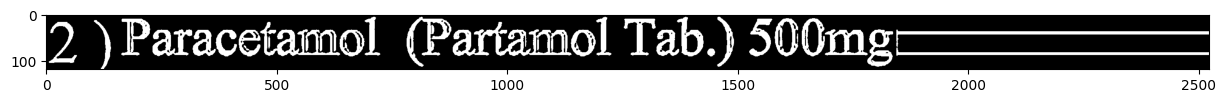

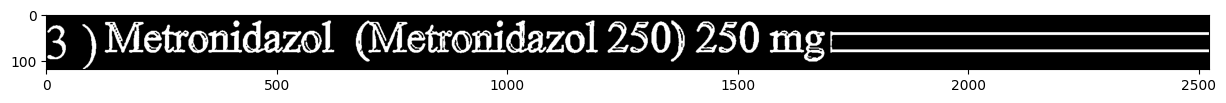

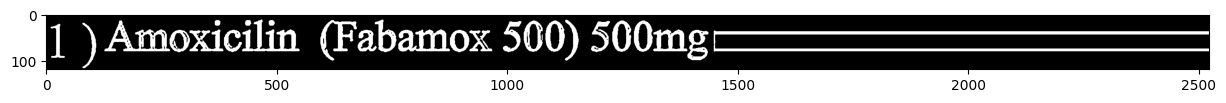

In [3]:
import numpy as np

training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
i=0
for img_path in X_train:
    img = cv2.cvtColor(cv2.imread(os.path.join(IMAGE_DIR, img_path)), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape
    img = cv2.resize(img,(int(118/height*width),118))
    height, width = img.shape

    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
    
    img = np.pad(img, ((0,0), (0, 2522 - width)), 'median')
    img = cv2.GaussianBlur(img, (5,5), 0)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    img = np.expand_dims(img, axis=2)
    img = img/255.0

    label = dict_filepath_label[img_path]
    orig_txt.append(label)
    train_label_length.append(len(label))
    train_input_length.append(TIME_STEP)
    training_img.append(img)
    training_txt.append(encode_to_labels(label))

    i+=1
    if i%500==0:
        print("has processed trained ", i, "file" )
        
print(resize_max_width)    #855

import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    plt.show()

In [4]:
max_label_len = TIME_STEP

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded_txt = pad_sequences(training_txt, maxlen= max_label_len, padding='post', value=0)
train_padded_txt[0]

array([ 9,  3,  0, 24, 28, 37, 20, 31, 23, 18, 35, 36,  0, 16, 13,  8,  0,
       16, 13,  8, 52, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

## Model Building

In [5]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from keras import ops
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

inputs = Input(shape=(118,2522,1))

# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

x = MaxPool2D(pool_size=(3, 1))(x)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

act_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 118, 2522, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 118, 2522, │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 39, 840,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 39, 840,   │          0 │ max_pooling2d[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 39, 840,   │     73,856 │ activation[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 280,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 13, 280,   │          0 │ max_pooling2d_1[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 280,   │    295,168 │ activation_1[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 280,   │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 280,   │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 280,   │    590,080 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 280,   │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 280,   │          0 │ batch_normalizat… │
│                     │ 256)              │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 280,   │          0 │ add[0][0]         │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 13, 280,   │  1,180,160 │ activation_3[0][… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 280,   │      2,048 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 13, 280,   │          0 │ batch_normalizat

 Total params: 21,901,647 (83.55 MB)

 Trainable params: 21,896,527 (83.53 MB)

 Non-trainable params: 5,120 (20.00 KB)

In [6]:
# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
print("max_label_len", max_label_len)


# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

max_label_len 240


In [16]:
# ready ctc loss function and optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"
    ),
    ModelCheckpoint(
        filepath=os.path.join('/kaggle/working/checkpoint.weights.h5'),
        monitor='loss',  # Change 'val_loss' to 'loss' to monitor the training loss
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='loss',  # Also monitor 'loss' for early stopping based on training loss
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='loss',  # Reduce learning rate based on training loss
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1
    )
]

callbacks_list = callbacks


In [19]:
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)
train_label_length = np.array(train_label_length)

batch_size = 32
epochs = 10

if os.path.exists('/kaggle/working/checkpoint.weights.h5'):
    act_model.load_weights(os.path.join('/kaggle/working/checkpoint.weights.h5'))

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          verbose = 1, callbacks = callbacks_list)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.6442
Epoch 1: loss improved from 5.57522 to 0.57229, saving model to /kaggle/working/checkpoint.weights.h5
70/70 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - loss: 0.6432 - learning_rate: 0.0010
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.2784
Epoch 2: loss improved from 0.57229 to 0.29713, saving model to /kaggle/working/checkpoint.weights.h5
70/70 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - loss: 0.2787 - learning_rate: 0.0010
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.2002
Epoch 3: loss improved from 0.29713 to 0.20721, saving model to /kaggle/working/checkpoint.weights.h5
70/70 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - loss: 0.2003 - learning_rate: 0.0010
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1257
Epoch 4: loss improved from 0.20721 to 0.13918, saving model to /kaggle/working/checkpoint.weights.h5
70/70 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - loss: 0.1259 - learning_rate: 0.0010
Epoch 5/10
70/70 ━━━

In [18]:
class CRNN():
    def __init__(self, img):
        self.img = img

    def preprocess_img(self, detected_image):
    
        height, width = detected_image.shape
        img = cv2.resize(detected_image,(int(118/height*width),118))
        height, width = img.shape
        
        img = np.pad(img, ((0,0), (0, 2522 - width)), 'median')
        img = cv2.GaussianBlur(img, (5,5), 0)
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
        img = np.expand_dims(img, axis = 2)
        img = img / 255.0

        return img

    def predict_text(self):
        test_img = []

        img = cv2.cvtColor(cv2.imread(self.img),cv2.COLOR_BGR2GRAY)
        img = self.preprocess_img(img)

        test_img.append(img)
        test_img = np.array(test_img)
        prediction = act_model.predict(test_img)

        out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                                greedy=True)[0][0])
        # see the results
        all_predictions =[]
        i = 0
        for x in out:
            print("predicted text = ", end = '')
            pred = ""
            for p in x:  
                if int(p) != -1:
                    pred += char_list[int(p)]
            print(pred)
            all_predictions.append(pred)
            i+=1

        return all_predictions

if __name__ == "__main__":
    img = "/kaggle/input/train-drugname/cropped_img/VAIPE_P_TRAIN_1001_16.png"
    predictor = CRNN(img)
    text = predictor.predict_text()
    print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
predicted text = 1)CEFADRXIL 500MC05g
['1)CEFADRXIL 500MC05g']
